In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


## Step 1

In [ ]:
# Define paths to image folders
peopleFolder = 'Datasets/Exercise_4/People'

dfPeople = pd.DataFrame()

# Calculate mean and standard deviation for each person's images
for person in os.listdir(peopleFolder):
    personPath = os.path.join(peopleFolder, person)
    if os.path.isdir(personPath):

        # Initialize lists to store means and standard deviations
        means = []
        stds = []
        names = []

        # Iterate through images in person's folder
        for filename in os.listdir(personPath):
            if filename.endswith('.png'):
                imagePath = os.path.join(personPath, filename)

                img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
        
                # Calculate mean and standard deviation of pixel values across all images
                mean = np.mean(img)
                std = np.std(img)

                # Add mean and standard deviation to lists
                means.append(mean)
                stds.append(std)
                names.append(person)

        # Calculate average mean and standard deviation across all people
        avgMean = np.mean(means)
        avgStd = np.mean(stds)
        dfPeople = dfPeople.append({'Name': person, 'Mean': avgMean, 'Std': avgStd}, ignore_index=True)
dfPeople

## Step 2

In [ ]:
testFolder = 'Datasets\Exercise_4\Test'

dfTest = pd.DataFrame()

# Initialize lists to store means and standard deviations
means = []
stds = []
names = []

# Calculate mean and standard deviation for each test image
for filename in os.listdir(testFolder):
    if filename.endswith('.png'):
        
        imagePath = os.path.join(testFolder, filename)

        img = cv2.imread(imagePath)

        mean = np.mean(img)
        std = np.std(img)

        means.append(mean)
        stds.append(std)
        names.append(filename)

dfTest['Name'] = names
dfTest['Mean'] = means
dfTest['Std'] = stds

dfTest

## Step 3

In [ ]:
dfDistance = pd.DataFrame(columns=['Predicted as', 'Andreas', 'Marie', 'Mikael', 'Stefan', 'Ulf', 'True Label'])
dfDistance['Predicted as'] = dfTest['Name']

# Calculate distance between each test image and each person's mean image with Euclidean distance
for index, row in dfTest.iterrows():
    for index2, row2 in dfPeople.iterrows():
        distance = np.sqrt((row['Mean'] - row2['Mean'])**2 + (row['Std'] - row2['Std'])**2)
        dfDistance.loc[index, row2['Name']] = distance

# Assign the name of the person with the smallest distance to the predicted label in the true label column
for index, row in dfDistance.iterrows():
    subset = dfDistance.loc[index, ['Andreas', 'Marie', 'Mikael', 'Stefan', 'Ulf']]
    if subset.isnull().values.any():
        dfDistance.loc[index, 'True Label'] = np.nan
    else:
        subset = pd.to_numeric(subset, errors='coerce')
        dfDistance.loc[index, 'True Label'] = subset.idxmin()
dfDistance

## 1

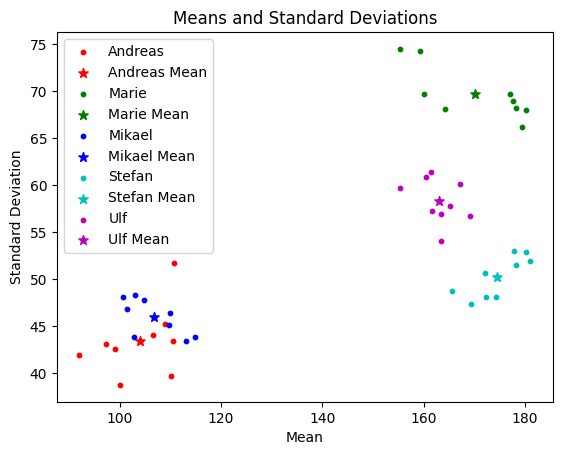

In [58]:
# Define colors for each person
colors = ['r', 'g', 'b', 'c', 'm']

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate through each person's data and plot their means and stds
for i, person in enumerate(dfPeople['Name']):
    personPath = os.path.join(peopleFolder, person)
    if os.path.isdir(personPath):
        personData = dfPeople.loc[dfPeople['Name'] == person]
        ax.scatter(personData['Mean'], personData['Std'], c=colors[i],  label=person, s=10)
        
        # Iterate through each image in person's folder and plot its mean and std
        for filename in os.listdir(personPath):
            if filename.endswith('.png'):
                imagePath = os.path.join(personPath, filename)

                img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
                
                # Calculate mean and standard deviation of pixel values for current image
                mean = np.mean(img)
                std = np.std(img)
                
                # Plot current image's mean and std as a separate point
                ax.scatter(mean, std, c=colors[i], s=10)

        # Plot mean and std for the person as a star
        ax.scatter(personData['Mean'].mean(), personData['Std'].mean(), marker='*', s=50, c=colors[i], label=person + ' Mean')

# Set axis labels and title
ax.set_xlabel('Mean')
ax.set_ylabel('Standard Deviation')
ax.set_title('Means and Standard Deviations')

# Add legend
ax.legend()

# Show plot
plt.show()